In [4]:
using OrdinaryDiffEq, ForwardDiff, Distributions, RandomNumbers, NPZ, PyPlot, StaticArrays

┌ Info: Precompiling OrdinaryDiffEq [1dea7af3-3e70-54e6-95c3-0bf5283fa5ed]
└ @ Base loading.jl:1273
┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1273
┌ Info: Precompiling NPZ [15e1cf62-19b3-5cfa-8e77-841668bca605]
└ @ Base loading.jl:1273


In [7]:
Ns=50
Times=1#000
listas=[0.5]
N=0
solu=0
alpha = 0.2
omega0 = 1. # (frequencia del sistema de dos niveles)
wc = 10. *omega0
s = 0.1
a = 2.
b = 1.
Hpart!(x,p)=p^2. /2. -0.5*2. *x^2. +0.25*1. *x^4.

Hpart! (generic function with 1 method)

## ACOPLES OSCAR

 77.908706 seconds (1.01 G allocations: 49.913 GiB, 17.67% gc time)


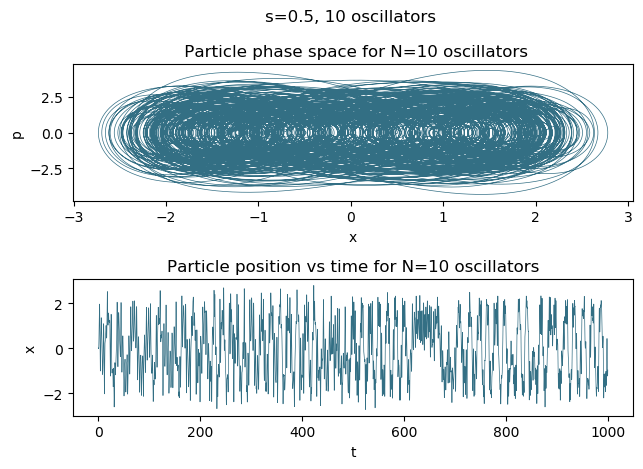

[0.0, 0.5297713642169909, 0.6381527518867839, 0.716251002476361, 0.7817802463369806, 0.8412908042993904, 0.8984588901817334, 0.956215899010481, 1.017957379654153, 1.0894786166242243, 1.1864821539106833]


In [12]:
function initial_sampling(Eb,w1,w2,mb)
    nums=rand(1)*2*pi
    x1=cos(nums[1])*sqrt(Eb/(0.5*mb*w1*w1))
    y1=sin(nums[1])*sqrt(2*mb*Eb)
    x2=cos(nums[1])*sqrt(Eb/(0.5*mb*w2*w2))
    y2=sin(nums[1])*sqrt(2*mb*Eb)
    return x1,y1,-x2,-y2
end

function initial_sampling_osc(Eb,w1,w2,mb)
    nums=rand(1)*2*pi
    x1=cos(nums[1])*sqrt(Eb/(0.5*mb*w1*w1))
    y1=sin(nums[1])*sqrt(2*mb*Eb)
    return x1,y1,-x1,-y1
end



function bolz_energy(a)
    return rand(Truncated(Exponential(1), 0., 5))
end
function bolz_freq(a)
    return rand()*0.4324555320336759+0.63
end

function osc_freq(a)
    return rand(Truncated(Exponential(1), 0., 10))
end

function osc_coupl(a)
    return rand(Truncated(Exponential(1), 0., 10))
end

alpha = 0.2
omega0 = 2 # (frequencia del sistema de dos niveles)
wc = 10*omega0/2
s = 0.1

initial_position = [0.1, 0.,0.,0.,0.,0.,0.,0.,0.]
initial_momentum=[0. ,0.1,0.,0.,0.,0.,0.,0.,0.]
#numeros=[6,8,10,16,20,26,30,36,40,50]
numeros=[30,36,40,50]
#listas=[0.1,0.2,0.4,0.5,0.6,0.8,1.,1.2,1.5,1.7,2.0,2.5]
#listas=[0.4]
for j in 1:size(listas)[1]
    s=listas[j]
#N=numeros[ii]
N=Ns
initial_position=ones(N+1)
initial_momentum=ones(N+1)

#a=0.2
#b=0.01
a=2.
b=1.

m=[1.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
w=[0.,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8]
g=[0.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

X0=17.    
P0=1.

golden=(1+sqrt(big(5)))/2
Es=zeros(N+1)

time=Times
#time=1.
tspan=(0., time)
#fig=figure()
w=zeros(N+1)
g=zeros(N+1)
E=zeros(N+1)
m=ones(N+1) .*0.1
m[1]=1.
    
w=w .* 0. .+ 1.


for ii in 1:N
    ii=Int(ii)
w[ii+1] = wc*(log(N+1)-log(N+1-ii))
g[ii+1] = sqrt(alpha*wc^(2. -s)*w[ii+1]^s/(2*(N+1.)))
end

#w=(bolz_freq.(w))
Es=(bolz_energy.(Es))

#for i in 1:(N-1)/2
#    i=Int(i)
#    w[i*2+1]=w[i*2]+0.0001
#end

#println(w)
W=maximum(w)
#g=g .* 0. .+ 0.3/N

dts=0.01*2. *pi/W
#Hsys(q,p) = p[1]^2. /(2. *m[1]) +m[1]*w[1]^2. *q[1]^2. /2. +0.5* -q[1]*g[2]*q[2]+p[2]^2. /(2. *m[2])+m[2]*w[2]^2. *q[2]^2. /2. + q[1]^2. *g[2]^2. /(2. *m[2]*w[2]^2.) -q[1]*g[3]*q[3]+p[3]^2. /(2. *m[3])+m[3]*w[3]^2. *q[3]^2. /2. + q[1]^2. *g[3]^2. /(2. *m[3]*w[3]^2.) -q[1]*g[4]*q[4]+p[4]^2. /(2. *m[4])+m[4]*w[4]^2. *q[4]^2. /2. + q[1]^2. *g[4]^2. /(2. *m[4]*w[4]^2.) -q[1]*g[5]*q[5]+p[5]^2. /(2. *m[5])+m[5]*w[5]^2. *q[5]^2. /2. + q[1]^2. *g[5]^2. /(2. *m[5]*w[5]^2.) -q[1]*g[6]*q[6]+p[6]^2. /(2. *m[6])+m[6]*w[6]^2. *q[6]^2. /2. + q[1]^2. *g[6]^2. /(2. *m[6]*w[6]^2.) -q[1]*g[7]*q[7]+p[7]^2. /(2. *m[7])+m[7]*w[7]^2. *q[7]^2. /2. + q[1]^2. *g[7]^2. /(2. *m[7]*w[7]^2.) -q[1]*g[8]*q[8]+p[8]^2. /(2. *m[8])+m[8]*w[8]^2. *q[8]^2. /2. + q[1]^2. *g[8]^2. /(2. *m[8]*w[8]^2.)-q[1]*g[9]*q[9]+p[9]^2. /(2. *m[9])+m[9]*w[9]^2. *q[9]^2. /2. + q[1]^2. *g[9]^2. /(2. *m[9]*w[9]^2.) 
function Hsys!(q,p,N0)
    result=p[1]^2. /(2. *m[1]) - a*q[1]^2. /2. +b*q[1]^4. /4.
    for i in 1:N0
        result +=  -q[1]*g[i+1]*q[i+1]+p[i+1]^2. /(2. *m[2])+m[i+1]*w[i+1]^2. *q[i+1]^2. /2. + q[1]^2. *g[i+1]^2. /(2. *m[i+1]*w[i+1]^2.) 
    end
    return result
end
pdot!(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys!(q, p,N), q)
qdot!(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys!(q, p,N), p)



initial_position=initial_position .* 0.
initial_momentum=initial_momentum .* 0.
initial_position[1]=0.0 #xz0[jj]
initial_momentum[1]=0.0 #pz1[jj]
for i in 1:(N-1)/2
    i=Int(i)
    initial_position[i*2], initial_momentum[i*2],initial_position[i*2+1], initial_momentum[i*2+1]=initial_sampling_osc(Es[i*2],w[i*2],w[i*2+1],m[i*2])
end
initial_position= initial_position
initial_momentum= initial_momentum 

prob = DynamicalODEProblem(pdot!, qdot!, initial_momentum, initial_position, tspan)
@time sol = solve(prob, CalvoSanz4(), dt=dts)
fig, axes = subplots(nrows=2, ncols=1)
subplot(2, 1, 1)
title("s=$s, $N oscillators \n \n Particle phase space for N=$N oscillators")
xlabel("x")
ylabel("p")
plot(sol[N+2,:],sol[1,:],color=(0.,75/255,102/255),linewidth=0.5,alpha=0.8)
subplot(2, 1, 2)
title("Particle position vs time for N=$N oscillators")
xlabel("t")
ylabel("x")
plot(sol.t[:], sol[N+2,:],color=(0.,75/255,102/255),linewidth=0.5,alpha=0.8)
fig.tight_layout()
#savefig("ohmicos_s/s$s.png")
#clf()
println(g)
end

## ACOPLES THOMAS

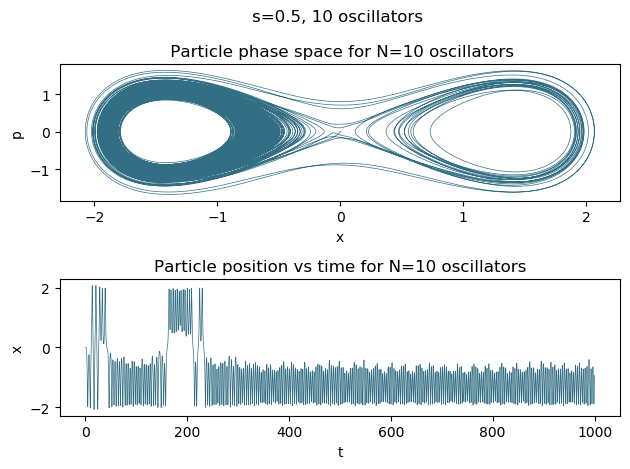

 70.783178 seconds (1.01 G allocations: 49.906 GiB, 19.43% gc time)


In [4]:
function initial_sampling(Eb,w1,w2,mb)
    nums=rand(1)*2*pi
    x1=cos(nums[1])*sqrt(Eb/(0.5*mb*w1*w1))
    y1=sin(nums[1])*sqrt(2*mb*Eb)
    x2=cos(nums[1])*sqrt(Eb/(0.5*mb*w2*w2))
    y2=sin(nums[1])*sqrt(2*mb*Eb)
    return x1,y1,-x2,-y2
end

function initial_sampling_osc(Eb,w1,w2,mb)
    nums=rand(1)*2*pi
    x1=cos(nums[1])*sqrt(Eb/(0.5*mb*w1*w1))
    y1=sin(nums[1])*sqrt(2*mb*Eb)
    return x1,y1,-x1,-y1
end



function bolz_energy(a)
    return rand(Truncated(Exponential(1), 0., 5))
end
function bolz_freq(a)
    return rand()*0.4324555320336759+0.63
end

function osc_freq(a)
    return rand(Truncated(Exponential(1), 0., 10))
end

function osc_coupl(a)
    return rand(Truncated(Exponential(1), 0., 10))
end

alpha = 0.2
omega0 = 2 # (frequencia del sistema de dos niveles)
wc = 10*omega0/2
s = 0.1

initial_position = [0.1, 0.,0.,0.,0.,0.,0.,0.,0.]
initial_momentum=[0. ,0.1,0.,0.,0.,0.,0.,0.,0.]
#numeros=[6,8,10,16,20,26,30,36,40,50]
numeros=[30,36,40,50]
#listas=[0.1,0.2,0.4,0.5,0.6,0.8,1.,1.2,1.5,1.7,2.0,2.5]
#listas=[0.4]
for j in 1:size(listas)[1]
    s=listas[j]
#N=numeros[ii]
N=Ns
initial_position=ones(N+1)
initial_momentum=ones(N+1)

#a=0.2
#b=0.01
a=2.
b=1.

m=[1.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
w=[0.,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8]
g=[0.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

X0=17.    
P0=1.

golden=(1+sqrt(big(5)))/2
Es=zeros(N+1)

time=Times
#time=1.
tspan=(0., time)
#fig=figure()
w=zeros(N+1)
g=zeros(N+1)
E=zeros(N+1)
m=ones(N+1) .*0.1
m[1]=1.
    
w=w .* 0. .+ 1.


for ii in 1:N
    ii=Int(ii)
w[ii+1] = wc*(log(N+1)-log(N+1-ii))
g[ii+1] = sqrt(alpha*wc^(2. -s)*w[ii+1]^s/(2*(N+1.)))
end

#w=(bolz_freq.(w))
Es=(bolz_energy.(Es))

#for i in 1:(N-1)/2
#    i=Int(i)
#    w[i*2+1]=w[i*2]+0.0001
#end

#println(w)
W=maximum(w)
g=g .* 0. .+ 0.3/N

dts=0.01*2. *pi/W
#Hsys(q,p) = p[1]^2. /(2. *m[1]) +m[1]*w[1]^2. *q[1]^2. /2. +0.5* -q[1]*g[2]*q[2]+p[2]^2. /(2. *m[2])+m[2]*w[2]^2. *q[2]^2. /2. + q[1]^2. *g[2]^2. /(2. *m[2]*w[2]^2.) -q[1]*g[3]*q[3]+p[3]^2. /(2. *m[3])+m[3]*w[3]^2. *q[3]^2. /2. + q[1]^2. *g[3]^2. /(2. *m[3]*w[3]^2.) -q[1]*g[4]*q[4]+p[4]^2. /(2. *m[4])+m[4]*w[4]^2. *q[4]^2. /2. + q[1]^2. *g[4]^2. /(2. *m[4]*w[4]^2.) -q[1]*g[5]*q[5]+p[5]^2. /(2. *m[5])+m[5]*w[5]^2. *q[5]^2. /2. + q[1]^2. *g[5]^2. /(2. *m[5]*w[5]^2.) -q[1]*g[6]*q[6]+p[6]^2. /(2. *m[6])+m[6]*w[6]^2. *q[6]^2. /2. + q[1]^2. *g[6]^2. /(2. *m[6]*w[6]^2.) -q[1]*g[7]*q[7]+p[7]^2. /(2. *m[7])+m[7]*w[7]^2. *q[7]^2. /2. + q[1]^2. *g[7]^2. /(2. *m[7]*w[7]^2.) -q[1]*g[8]*q[8]+p[8]^2. /(2. *m[8])+m[8]*w[8]^2. *q[8]^2. /2. + q[1]^2. *g[8]^2. /(2. *m[8]*w[8]^2.)-q[1]*g[9]*q[9]+p[9]^2. /(2. *m[9])+m[9]*w[9]^2. *q[9]^2. /2. + q[1]^2. *g[9]^2. /(2. *m[9]*w[9]^2.) 
function Hsys(q,p,N0)
    result=p[1]^2. /(2. *m[1]) - a*q[1]^2. /2. +b*q[1]^4. /4.
    for i in 1:N0
        result +=  -q[1]*g[i+1]*q[i+1]+p[i+1]^2. /(2. *m[2])+m[i+1]*w[i+1]^2. *q[i+1]^2. /2. + q[1]^2. *g[i+1]^2. /(2. *m[i+1]*w[i+1]^2.) 
    end
    return result
end
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p,N), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p,N), p)



initial_position=initial_position .* 0.
initial_momentum=initial_momentum .* 0.
initial_position[1]=0.0 #xz0[jj]
initial_momentum[1]=0.0 #pz1[jj]
for i in 1:(N-1)/2
    i=Int(i)
    initial_position[i*2], initial_momentum[i*2],initial_position[i*2+1], initial_momentum[i*2+1]=initial_sampling_osc(Es[i*2],w[i*2],w[i*2+1],m[i*2])
end

 
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
@time sol = solve(prob, CalvoSanz4(), dt=dts)
fig, axes = subplots(nrows=2, ncols=1)
subplot(2, 1, 1)
title("s=$s, $N oscillators \n \n Particle phase space for N=$N oscillators")
xlabel("x")
ylabel("p")
plot(sol[N+2,:],sol[1,:],color=(0.,75/255,102/255),linewidth=0.5,alpha=0.8)
subplot(2, 1, 2)
title("Particle position vs time for N=$N oscillators")
xlabel("t")
ylabel("x")
plot(sol.t[:], sol[N+2,:],color=(0.,75/255,102/255),linewidth=0.5,alpha=0.8)
fig.tight_layout()
#savefig("ohmicos_s/s$s.png")
#clf()
end

## ACOPLES OSCAR sin la simetria

  5.694743 seconds (45.42 M allocations: 1.977 GiB, 7.41% gc time)


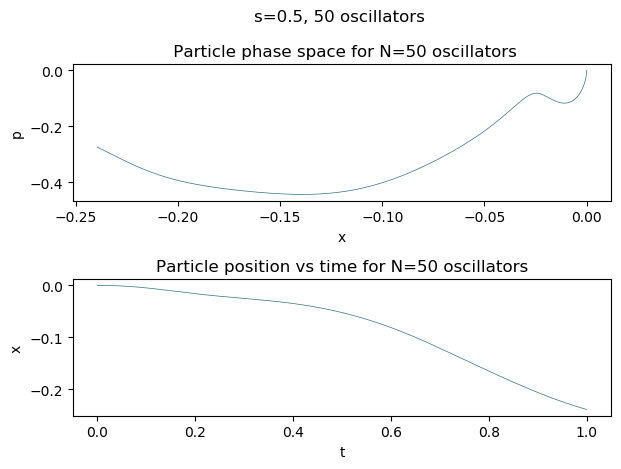

s=0.5
g= [0.16610993771282642, 0.1980361108334617, 0.21972383605613519, 0.2367234201901955, 0.2509679426130168, 0.2633807481538323, 0.2744814369109587, 0.28459410962463233, 0.2939358945679718, 0.3026601542196092, 0.3108797471441391, 0.3186805114608307, 0.32612954568021235, 0.3332805376518944, 0.34017732937325534, 0.3468563813939784, 0.35334852584477705, 0.3596802455367252, 0.36587462923284625, 0.37195210096847064, 0.3779309890672676, 0.3838279800703101, 0.3896584895596358, 0.39543697314430265, 0.40117719509676025, 0.4068924683179473, 0.4125958768850193, 0.4183004910473247, 0.42401958399564516, 0.4297668599691383, 0.4355567043239228, 0.4414044682238332, 0.4473268039360341, 0.4533420718523847, 0.45947084819370076, 0.46573657435610266, 0.4721664075093728, 0.47879236166374883, 0.4856528766930106, 0.4927950340552545, 0.5002777799424486, 0.5081767758700666, 0.5165919954889863, 0.525660207833156, 0.5355767457272718, 0.5466364578913747, 0.5593189338134832, 0.5744929871338741, 0.594027936548119

In [8]:
function initial_sampling(Eb,w1,mb)
    nums=rand(1)*2*pi
    x1=cos(nums[1])*sqrt(Eb/(0.5*mb*w1*w1))
    y1=sin(nums[1])*sqrt(2*mb*Eb)
    return x1,y1
end

function initial_sampling_osc(Eb,w1,w2,mb)
    nums=rand(1)*2*pi
    x1=cos(nums[1])*sqrt(Eb/(0.5*mb*w1*w1))
    y1=sin(nums[1])*sqrt(2*mb*Eb)
    return x1,y1,-x1,-y1
end



function bolz_energy(a)
    return rand(Truncated(Exponential(1), 0., 5))
end
function bolz_freq(a)
    return rand()*0.4324555320336759+0.63
end

function osc_freq(a)
    return rand(Truncated(Exponential(1), 0., 10))
end

function osc_coupl(a)
    return rand(Truncated(Exponential(1), 0., 10))
end

#alpha = 0.2
#omega0 = 2 # (frequencia del sistema de dos niveles)
#wc = 5*omega0/2
#s = 0.1

initial_position = [0.1, 0.,0.,0.,0.,0.,0.,0.,0.]
initial_momentum=[0. ,0.1,0.,0.,0.,0.,0.,0.,0.]
#numeros=[6,8,10,16,20,26,30,36,40,50]
numeros=[30,36,40,50]
#listas=[0.1,0.2,0.4,0.5,0.6,0.8,1.,1.2,1.5,1.7,2.0,2.5]
#listas=[0.4]
for j in 1:size(listas)[1]
    s=listas[j]
#N=numeros[ii]
N=Ns
initial_position=ones(N+1)
initial_momentum=ones(N+1)

#a=0.2
#b=0.01
#a=2.
#b=1.

m=[1.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
w=[0.,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8]
g=[0.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

X0=17.    
P0=1.

golden=(1+sqrt(big(5)))/2
Es=zeros(N+1)

time=Times
#time=1.
tspan=(0., time)
#fig=figure()
w=zeros(N+1)
g=zeros(N+1)
E=zeros(N+1)
m=ones(N+1) .*0.1
m[1]=1.
    
w=w .* 0. .+ 1.


for ii in 1:N
    ii=Int(ii)
w[ii+1] = wc*(log(N+1)-log(N+1-ii))
g[ii+1] = sqrt(alpha*wc^(2. -s)*w[ii+1]^s/(2*(N+1.)))
end

#w=(bolz_freq.(w))
Es=(bolz_energy.(Es))

#for i in 1:(N-1)/2
#    i=Int(i)
#    w[i*2+1]=w[i*2]+0.0001
#end

#println(w)
W=maximum(w)
#g=g .* 0. .+ 0.3/N

dts=0.01*2. *pi/W
#Hsys(q,p) = p[1]^2. /(2. *m[1]) +m[1]*w[1]^2. *q[1]^2. /2. +0.5* -q[1]*g[2]*q[2]+p[2]^2. /(2. *m[2])+m[2]*w[2]^2. *q[2]^2. /2. + q[1]^2. *g[2]^2. /(2. *m[2]*w[2]^2.) -q[1]*g[3]*q[3]+p[3]^2. /(2. *m[3])+m[3]*w[3]^2. *q[3]^2. /2. + q[1]^2. *g[3]^2. /(2. *m[3]*w[3]^2.) -q[1]*g[4]*q[4]+p[4]^2. /(2. *m[4])+m[4]*w[4]^2. *q[4]^2. /2. + q[1]^2. *g[4]^2. /(2. *m[4]*w[4]^2.) -q[1]*g[5]*q[5]+p[5]^2. /(2. *m[5])+m[5]*w[5]^2. *q[5]^2. /2. + q[1]^2. *g[5]^2. /(2. *m[5]*w[5]^2.) -q[1]*g[6]*q[6]+p[6]^2. /(2. *m[6])+m[6]*w[6]^2. *q[6]^2. /2. + q[1]^2. *g[6]^2. /(2. *m[6]*w[6]^2.) -q[1]*g[7]*q[7]+p[7]^2. /(2. *m[7])+m[7]*w[7]^2. *q[7]^2. /2. + q[1]^2. *g[7]^2. /(2. *m[7]*w[7]^2.) -q[1]*g[8]*q[8]+p[8]^2. /(2. *m[8])+m[8]*w[8]^2. *q[8]^2. /2. + q[1]^2. *g[8]^2. /(2. *m[8]*w[8]^2.)-q[1]*g[9]*q[9]+p[9]^2. /(2. *m[9])+m[9]*w[9]^2. *q[9]^2. /2. + q[1]^2. *g[9]^2. /(2. *m[9]*w[9]^2.) 
function Hsys(q,p,N0)
    result=p[1]^2. /(2. *m[1]) - a*q[1]^2. /2. +b*q[1]^4. /4.
    for i in 1:N0
        result +=  -q[1]*g[i+1]*q[i+1]+p[i+1]^2. /(2. *m[2])+m[i+1]*w[i+1]^2. *q[i+1]^2. /2. + q[1]^2. *g[i+1]^2. /(2. *m[i+1]*w[i+1]^2.) 
    end
    return result
end
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p,N), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p,N), p)



initial_position=initial_position .* 0.
initial_momentum=initial_momentum .* 0.

for i in 1:N
    i=Int(i)
    initial_position[i], initial_momentum[i]=initial_sampling(Es[i],w[i],m[i])
end
    

initial_position[1]=0.0 #xz0[jj]
initial_momentum[1]=0.0 #pz1[jj]
 
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
@time sol = solve(prob, CalvoSanz4(), dt=dts)
    solu=sol
fig, axes = subplots(nrows=2, ncols=1)

subplot(2, 1, 1)

title("s=$s, $N oscillators \n \n Particle phase space for N=$N oscillators")
xlabel("x")
ylabel("p")
plot(sol[N+2,:],sol[1,:],color=(0.,75/255,102/255),linewidth=0.5,alpha=0.8)
subplot(2, 1, 2)

title("Particle position vs time for N=$N oscillators")
xlabel("t")
ylabel("x")
plot(sol.t[:], sol[N+2,:],color=(0.,75/255,102/255),linewidth=0.5,alpha=0.8)
fig.tight_layout()

#savefig("ohmicos_s/s$s.png")
#clf()
println("s=$s")
println("g= ",g[2:end])
println("w= ", w[2:end])
end

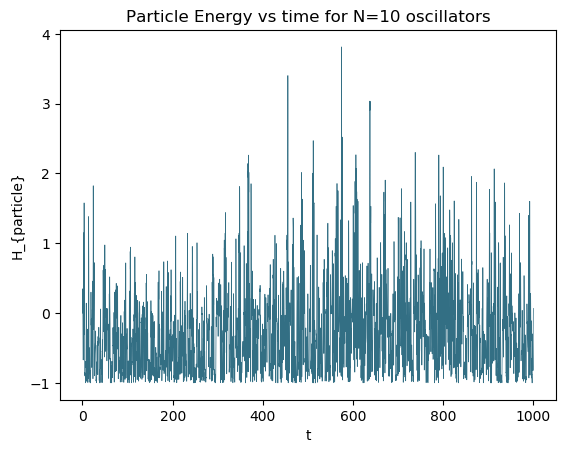

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x17dcde0d0>

In [77]:
title("Particle Energy vs time for N=$N oscillators")
xlabel("t")
ylabel("H_{particle}")
plot(solu.t[:], Hpart!.(solu[N+2,:],solu[1,:]),color=(0.,75/255,102/255),linewidth=0.5,alpha=0.8)

## ACOPLES THOMAS sin simetria

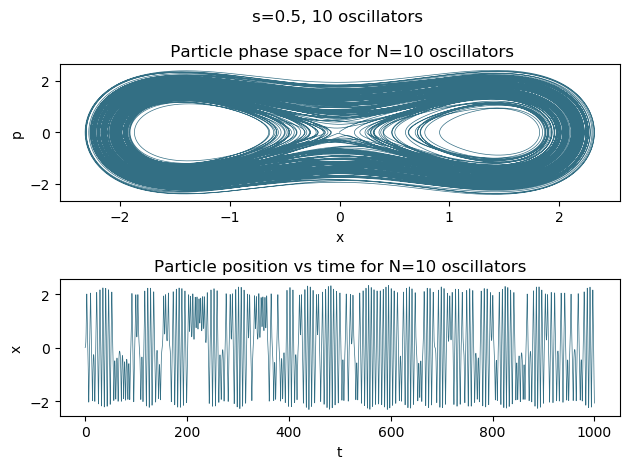

 75.714013 seconds (1.01 G allocations: 49.909 GiB, 19.42% gc time)


In [6]:
function initial_sampling(Eb,w1,mb)
    nums=rand(1)*2*pi
    x1=cos(nums[1])*sqrt(Eb/(0.5*mb*w1*w1))
    y1=sin(nums[1])*sqrt(2*mb*Eb)
    return x1,y1
end

function initial_sampling_osc(Eb,w1,w2,mb)
    nums=rand(1)*2*pi
    x1=cos(nums[1])*sqrt(Eb/(0.5*mb*w1*w1))
    y1=sin(nums[1])*sqrt(2*mb*Eb)
    return x1,y1,-x1,-y1
end



function bolz_energy(a)
    return rand(Truncated(Exponential(1), 0., 5))
end
function bolz_freq(a)
    return rand()*0.4324555320336759+0.63
end

function osc_freq(a)
    return rand(Truncated(Exponential(1), 0., 10))
end

function osc_coupl(a)
    return rand(Truncated(Exponential(1), 0., 10))
end

alpha = 0.2
omega0 = 2 # (frequencia del sistema de dos niveles)
wc = 10*omega0/2
s = 0.1

initial_position = [0.1, 0.,0.,0.,0.,0.,0.,0.,0.]
initial_momentum=[0. ,0.1,0.,0.,0.,0.,0.,0.,0.]
#numeros=[6,8,10,16,20,26,30,36,40,50]
numeros=[30,36,40,50]
#listas=[0.1,0.2,0.4,0.5,0.6,0.8,1.,1.2,1.5,1.7,2.0,2.5]
#listas=[0.4]
for j in 1:size(listas)[1]
    s=listas[j]
#N=numeros[ii]
N=Ns
initial_position=ones(N+1)
initial_momentum=ones(N+1)

#a=0.2
#b=0.01
a=2.
b=1.

m=[1.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
w=[0.,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8]
g=[0.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

X0=17.    
P0=1.

golden=(1+sqrt(big(5)))/2
Es=zeros(N+1)

time=Times
#time=1.
tspan=(0., time)
#fig=figure()
w=zeros(N+1)
g=zeros(N+1)
E=zeros(N+1)
m=ones(N+1) .*0.1
m[1]=1.
    
w=w .* 0. .+ 1.


for ii in 1:N
    ii=Int(ii)
w[ii+1] = wc*(log(N+1)-log(N+1-ii))
g[ii+1] = sqrt(alpha*wc^(2. -s)*w[ii+1]^s/(2*(N+1.)))
end

#w=(bolz_freq.(w))
Es=(bolz_energy.(Es))

#for i in 1:(N-1)/2
#    i=Int(i)
#    w[i*2+1]=w[i*2]+0.0001
#end

#println(w)
W=maximum(w)
g=g .* 0. .+ 0.3/N

dts=0.01*2. *pi/W
#Hsys(q,p) = p[1]^2. /(2. *m[1]) +m[1]*w[1]^2. *q[1]^2. /2. +0.5* -q[1]*g[2]*q[2]+p[2]^2. /(2. *m[2])+m[2]*w[2]^2. *q[2]^2. /2. + q[1]^2. *g[2]^2. /(2. *m[2]*w[2]^2.) -q[1]*g[3]*q[3]+p[3]^2. /(2. *m[3])+m[3]*w[3]^2. *q[3]^2. /2. + q[1]^2. *g[3]^2. /(2. *m[3]*w[3]^2.) -q[1]*g[4]*q[4]+p[4]^2. /(2. *m[4])+m[4]*w[4]^2. *q[4]^2. /2. + q[1]^2. *g[4]^2. /(2. *m[4]*w[4]^2.) -q[1]*g[5]*q[5]+p[5]^2. /(2. *m[5])+m[5]*w[5]^2. *q[5]^2. /2. + q[1]^2. *g[5]^2. /(2. *m[5]*w[5]^2.) -q[1]*g[6]*q[6]+p[6]^2. /(2. *m[6])+m[6]*w[6]^2. *q[6]^2. /2. + q[1]^2. *g[6]^2. /(2. *m[6]*w[6]^2.) -q[1]*g[7]*q[7]+p[7]^2. /(2. *m[7])+m[7]*w[7]^2. *q[7]^2. /2. + q[1]^2. *g[7]^2. /(2. *m[7]*w[7]^2.) -q[1]*g[8]*q[8]+p[8]^2. /(2. *m[8])+m[8]*w[8]^2. *q[8]^2. /2. + q[1]^2. *g[8]^2. /(2. *m[8]*w[8]^2.)-q[1]*g[9]*q[9]+p[9]^2. /(2. *m[9])+m[9]*w[9]^2. *q[9]^2. /2. + q[1]^2. *g[9]^2. /(2. *m[9]*w[9]^2.) 
function Hsys(q,p,N0)
    result=p[1]^2. /(2. *m[1]) - a*q[1]^2. /2. +b*q[1]^4. /4.
    for i in 1:N0
        result +=  -q[1]*g[i+1]*q[i+1]+p[i+1]^2. /(2. *m[2])+m[i+1]*w[i+1]^2. *q[i+1]^2. /2. + q[1]^2. *g[i+1]^2. /(2. *m[i+1]*w[i+1]^2.) 
    end
    return result
end
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p,N), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p,N), p)



initial_position=initial_position .* 0.
initial_momentum=initial_momentum .* 0.

for i in 1:N
    i=Int(i)
    initial_position[i], initial_momentum[i]=initial_sampling(Es[i],w[i],m[i])
end
    
initial_position[1]=0.0 #xz0[jj]
initial_momentum[1]=0.0 #pz1[jj]

 
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
@time sol = solve(prob, CalvoSanz4(), dt=dts)
fig, axes = subplots(nrows=2, ncols=1)
subplot(2, 1, 1)
title("s=$s, $N oscillators \n \n Particle phase space for N=$N oscillators")
xlabel("x")
ylabel("p")
plot(sol[N+2,:],sol[1,:],color=(0.,75/255,102/255),linewidth=0.5,alpha=0.8)
subplot(2, 1, 2)
title("Particle position vs time for N=$N oscillators")
xlabel("t")
ylabel("x")
plot(sol.t[:], sol[N+2,:],color=(0.,75/255,102/255),linewidth=0.5,alpha=0.8)
fig.tight_layout()
#savefig("ohmicos_s/s$s.png")
#clf()
end